# Imports

In [22]:
import pandas as pd
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,classification_report

# Loading the dataset

In [2]:
df=pd.read_csv("cs-training.csv")

In [3]:
df.shape

(150000, 12)

In [4]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [6]:
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# Data cleaning

In [7]:
df=df.drop(columns=["Unnamed: 0"])

In [8]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [9]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [10]:
df["MonthlyIncome"]=df["MonthlyIncome"].fillna(df["MonthlyIncome"].mean())

In [11]:
df["NumberOfDependents"]=df["NumberOfDependents"].fillna(round(df["NumberOfDependents"].mean()))

In [12]:
df.duplicated().sum()

622

In [13]:
df=df.drop_duplicates()

# Adjusting the features

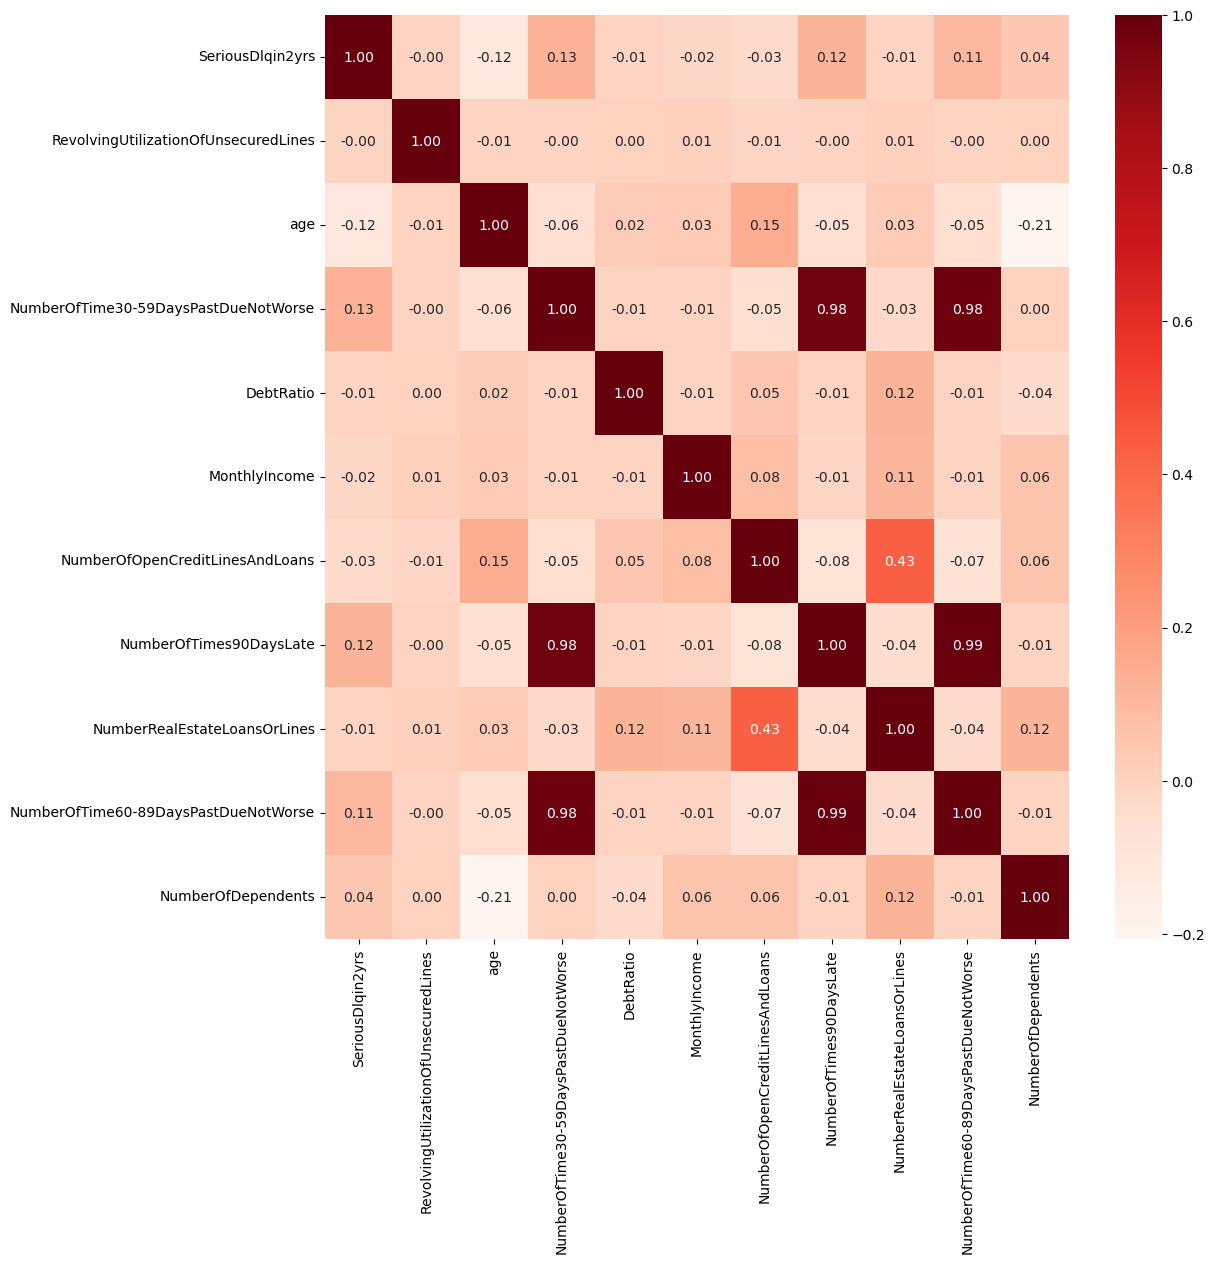

In [14]:
plt.figure(figsize=(12,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f');

In [15]:
df['TotalPastDue'] = df['NumberOfTime30-59DaysPastDueNotWorse'] + df['NumberOfTimes90DaysLate'] + df['NumberOfTime60-89DaysPastDueNotWorse']

In [16]:
df=df.drop(columns=["NumberOfTime30-59DaysPastDueNotWorse","NumberOfTimes90DaysLate","NumberOfTime60-89DaysPastDueNotWorse"])

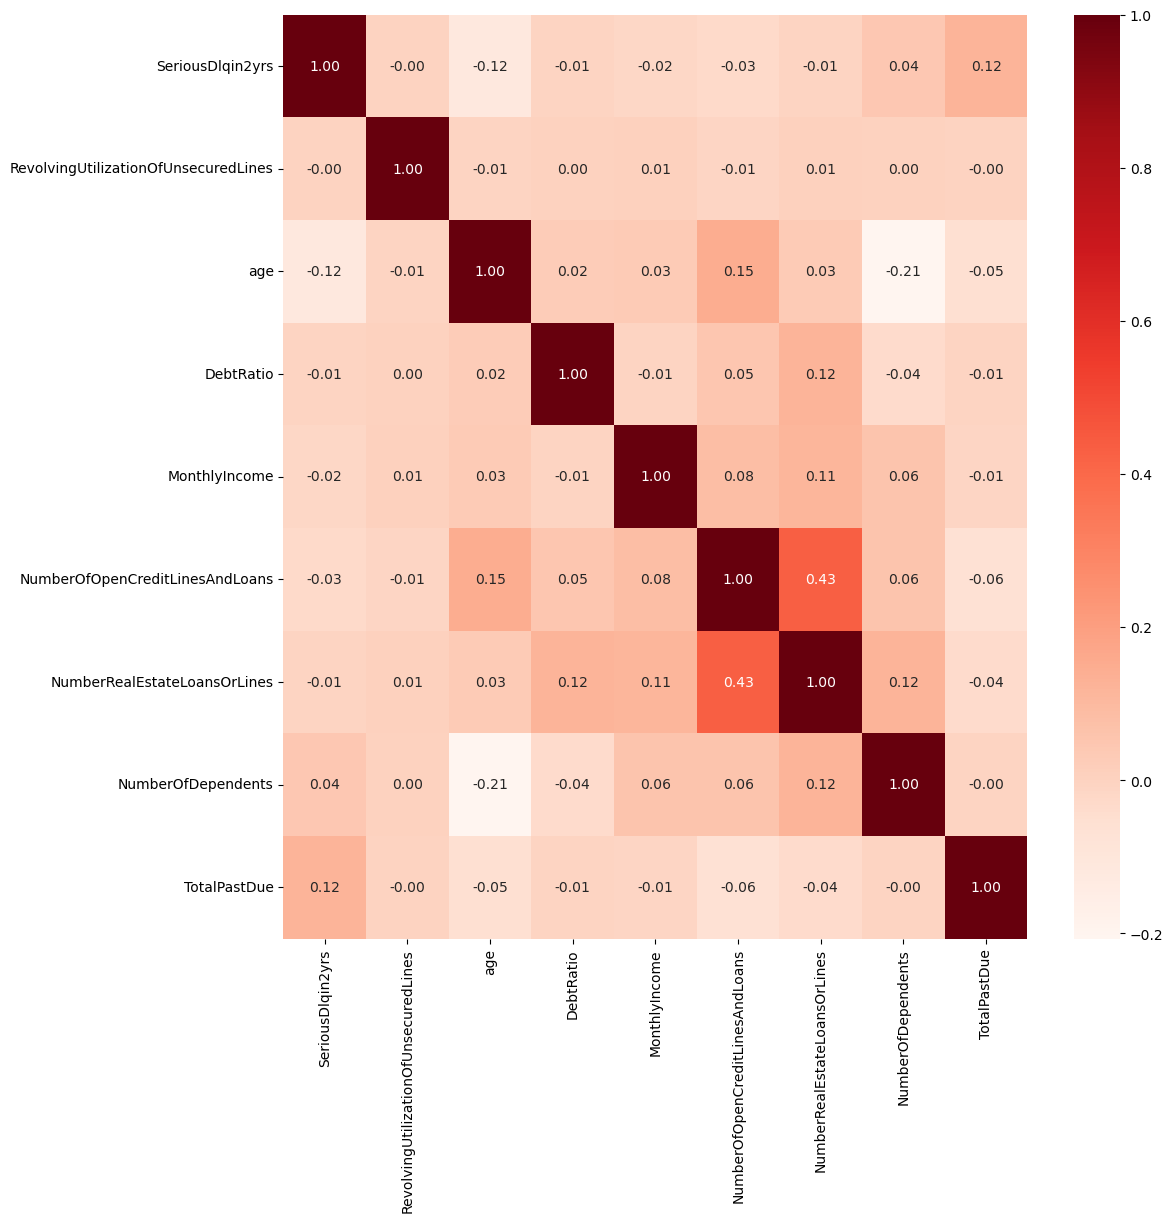

In [17]:
plt.figure(figsize=(12,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f');

# Visualization

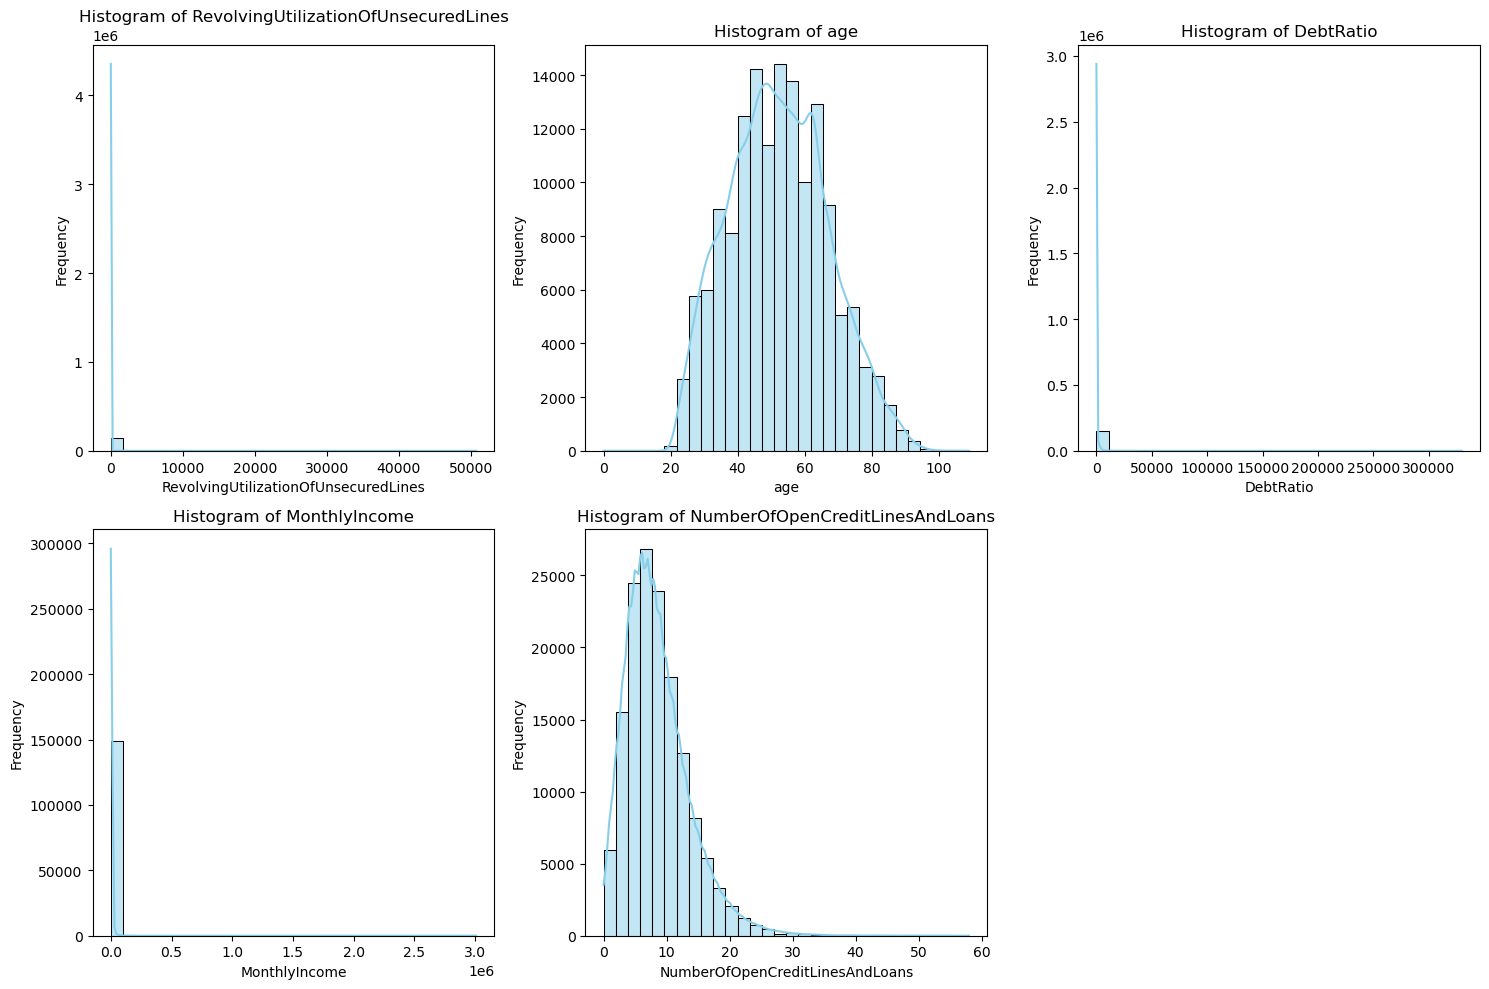

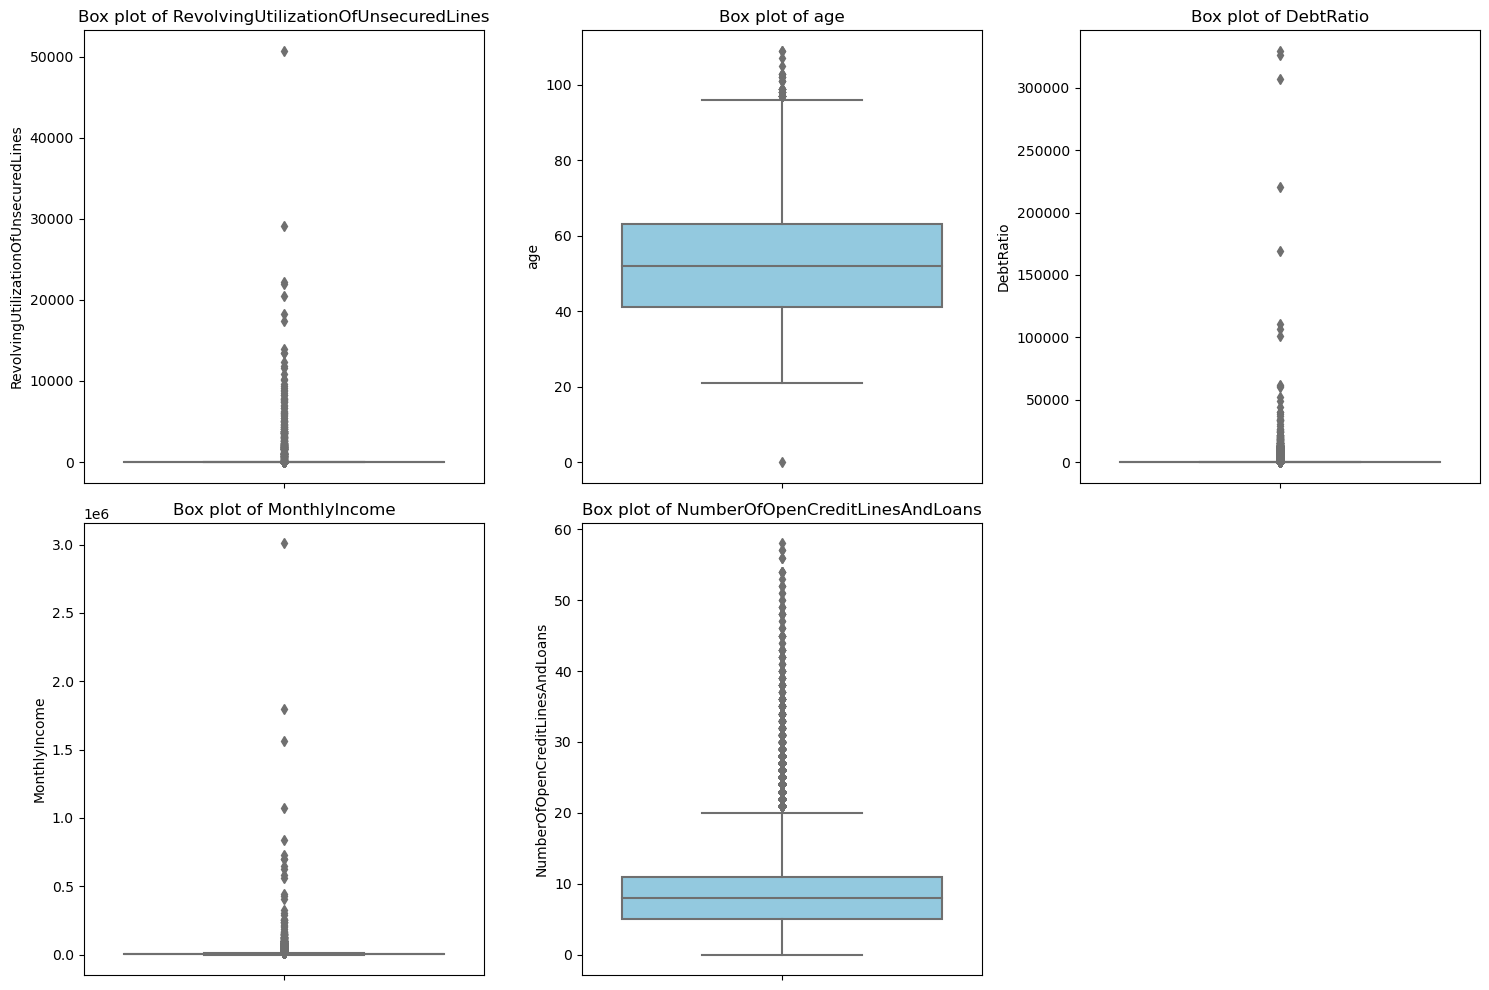

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns for visualization
columns_to_visualize = [
    'RevolvingUtilizationOfUnsecuredLines', 
    'age', 
    'DebtRatio', 
    'MonthlyIncome', 
    'NumberOfOpenCreditLinesAndLoans'
]

# Create subplots for histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create subplots for box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Box plot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


# Splitting the data

In [19]:
x=df.drop(columns=["SeriousDlqin2yrs"])
y=df['SeriousDlqin2yrs']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1, shuffle =True)

# Machine learning

In [33]:
import xgboost as xgb

# Create and train an XGBoost classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

# Make predictions and evaluate
y_pred_xgb = xgb_model.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.935968670504753
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27918
           1       0.54      0.17      0.26      1958

    accuracy                           0.94     29876
   macro avg       0.74      0.58      0.61     29876
weighted avg       0.92      0.94      0.92     29876



In [34]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9358347837729281
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27918
           1       0.53      0.16      0.25      1958

    accuracy                           0.94     29876
   macro avg       0.74      0.58      0.61     29876
weighted avg       0.92      0.94      0.92     29876



In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Make predictions and evaluate
y_pred_knn = knn_model.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9329562190386933
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     27918
           1       0.38      0.04      0.06      1958

    accuracy                           0.93     29876
   macro avg       0.66      0.52      0.51     29876
weighted avg       0.90      0.93      0.91     29876



# Data distribution and standardization

Column 'SeriousDlqin2yrs':
  Shapiro-Wilk Test:
    Statistic: 0.26956260204315186
    P-value: 0.0
    The data does not appear to be normally distributed.


D:\college\Anaconda\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


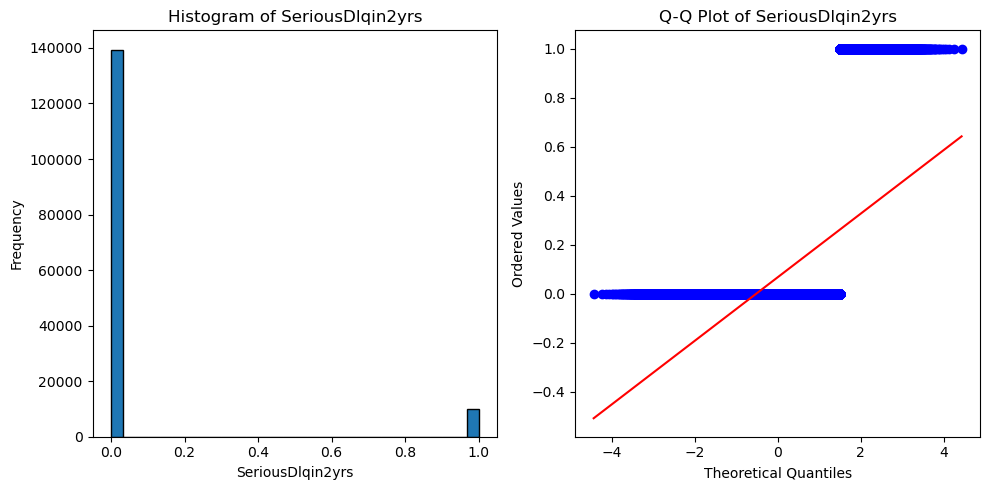

Column 'RevolvingUtilizationOfUnsecuredLines':
  Shapiro-Wilk Test:
    Statistic: 0.007027626037597656
    P-value: 0.0
    The data does not appear to be normally distributed.


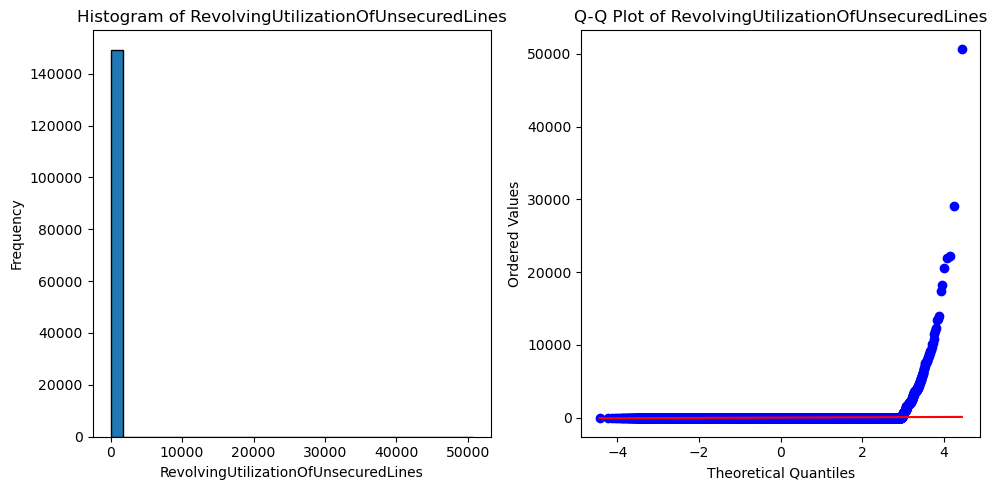

Column 'age':
  Shapiro-Wilk Test:
    Statistic: 0.9908760190010071
    P-value: 0.0
    The data does not appear to be normally distributed.


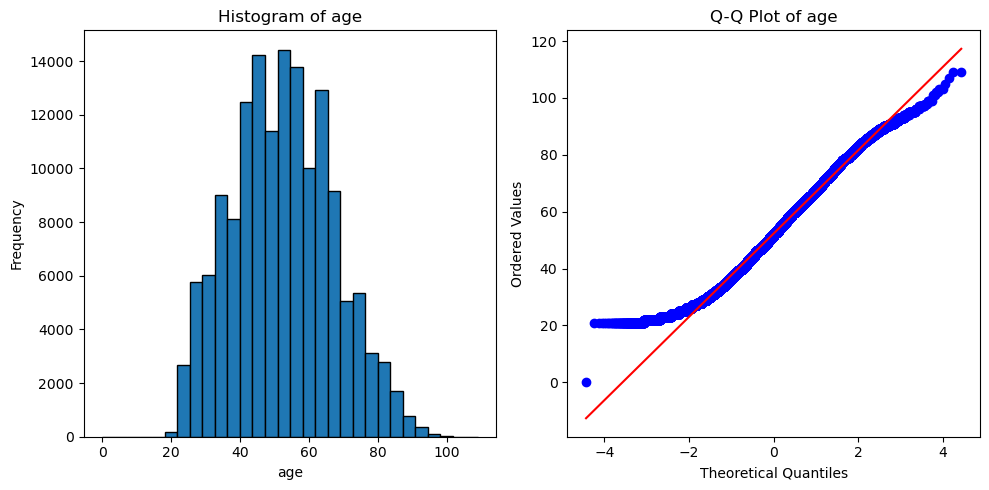

Column 'DebtRatio':
  Shapiro-Wilk Test:
    Statistic: 0.11873286962509155
    P-value: 0.0
    The data does not appear to be normally distributed.


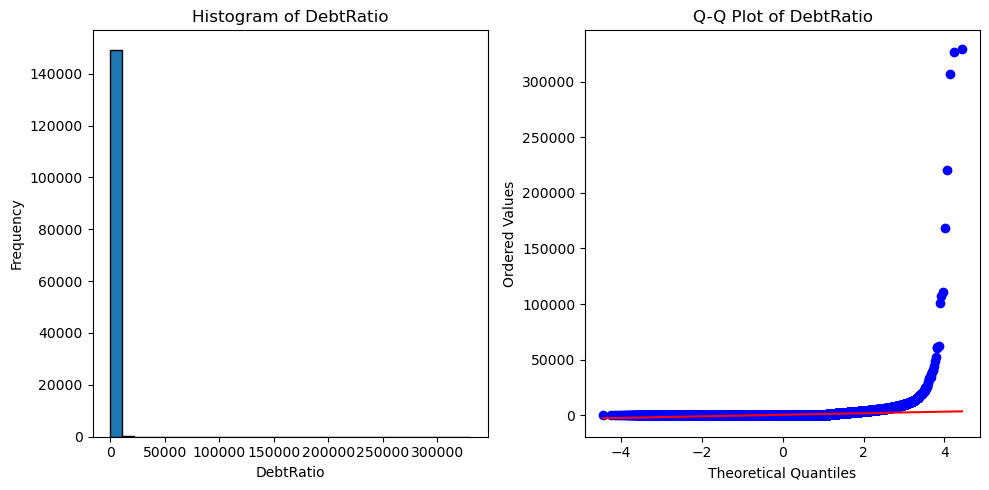

Column 'MonthlyIncome':
  Shapiro-Wilk Test:
    Statistic: 0.12372386455535889
    P-value: 0.0
    The data does not appear to be normally distributed.


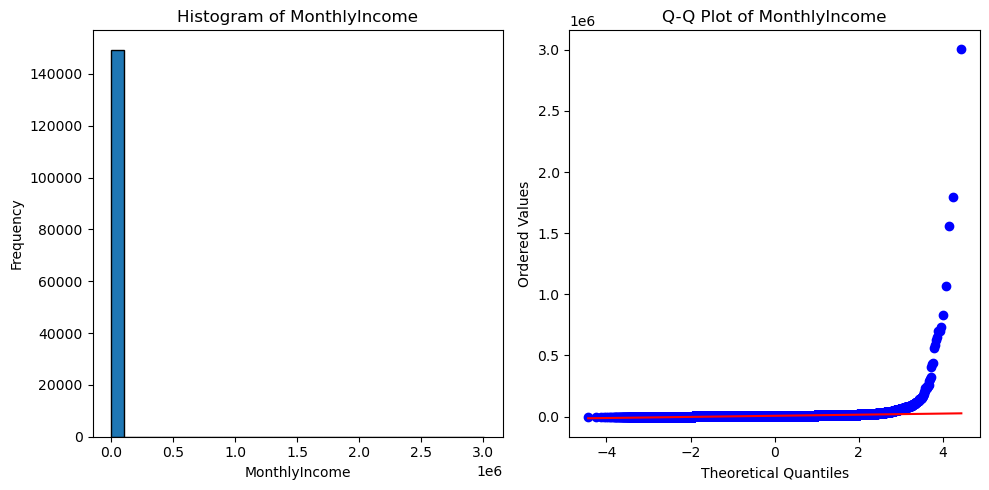

Column 'NumberOfOpenCreditLinesAndLoans':
  Shapiro-Wilk Test:
    Statistic: 0.9298692345619202
    P-value: 0.0
    The data does not appear to be normally distributed.


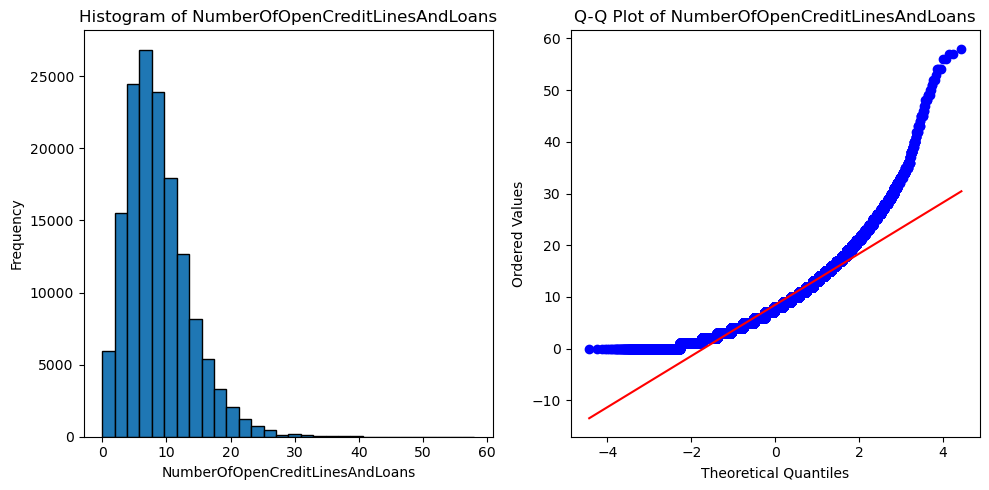

Column 'NumberRealEstateLoansOrLines':
  Shapiro-Wilk Test:
    Statistic: 0.7470189332962036
    P-value: 0.0
    The data does not appear to be normally distributed.


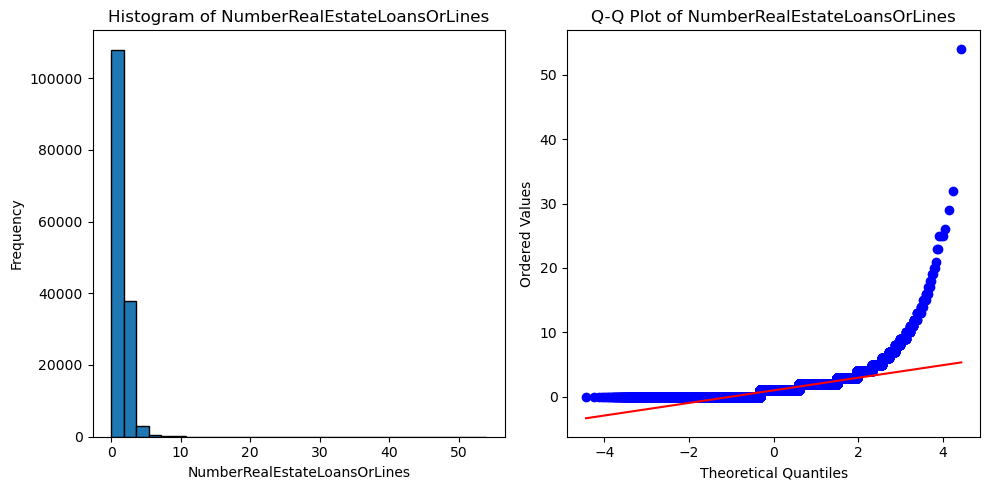

Column 'NumberOfDependents':
  Shapiro-Wilk Test:
    Statistic: 0.721752941608429
    P-value: 0.0
    The data does not appear to be normally distributed.


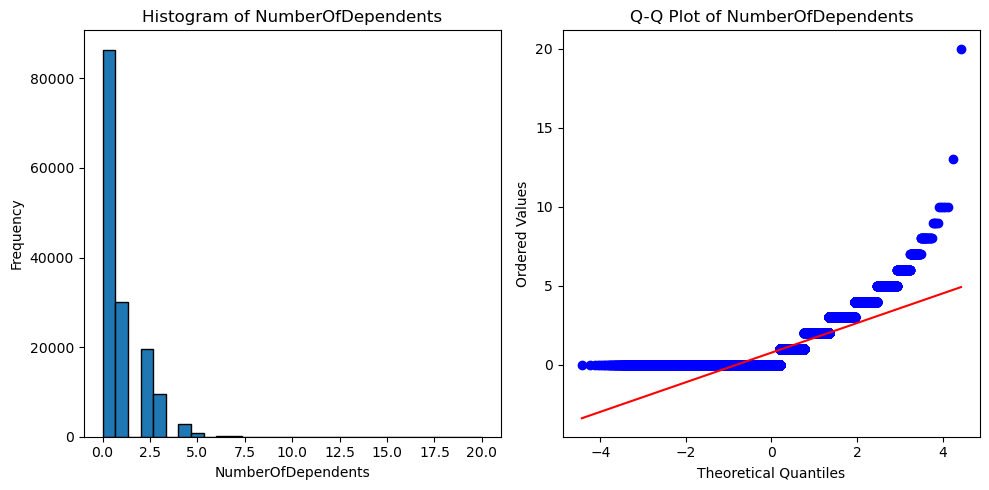

Column 'TotalPastDue':
  Shapiro-Wilk Test:
    Statistic: 0.03474456071853638
    P-value: 0.0
    The data does not appear to be normally distributed.


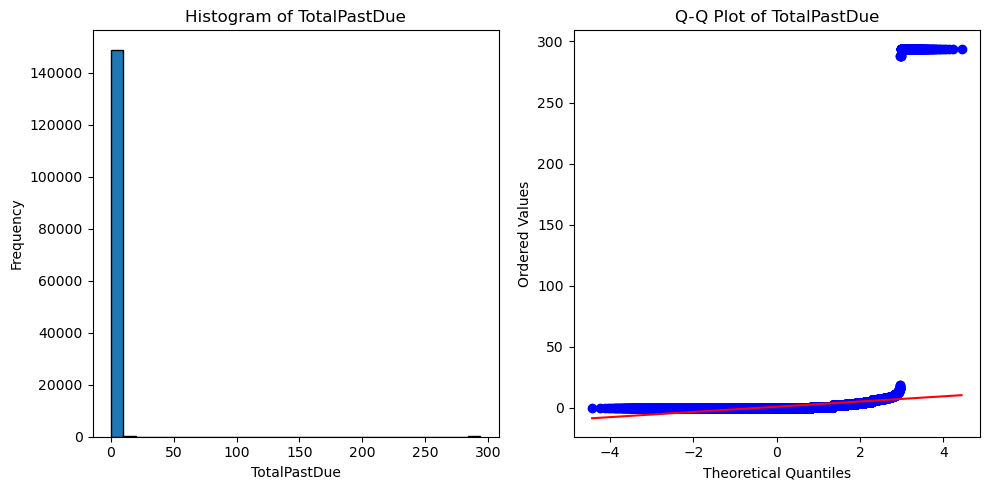

In [36]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Check for normality in each column of the DataFrame
for column in df.columns:
    statistic, p_value = stats.shapiro(df[column])
    print(f"Column '{column}':")
    print("  Shapiro-Wilk Test:")
    print("    Statistic:", statistic)
    print("    P-value:", p_value)
    if p_value > 0.05:
        print("    The data appears to be normally distributed.")
    else:
        print("    The data does not appear to be normally distributed.")

    # Plot histogram
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Plot Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.tight_layout()
    plt.show()


In [37]:
from sklearn.preprocessing import StandardScaler


# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the features
x_standardized = scaler.fit_transform(x)

# Convert the standardized array back to a DataFrame
x_standardized = pd.DataFrame(x_standardized, columns=x.columns)

# Display the first few rows of the standardized features
print(x_standardized.head())


   RevolvingUtilizationOfUnsecuredLines       age  DebtRatio  MonthlyIncome  \
0                             -0.021199 -0.496095  -0.173202       0.189509   
1                             -0.020435 -0.835653  -0.173535      -0.315671   
2                             -0.021630 -0.971476  -0.173553      -0.281425   
3                             -0.023325 -1.514768  -0.173577      -0.261434   
4                             -0.020635 -0.224448  -0.173583       4.409780   

   NumberOfOpenCreditLinesAndLoans  NumberRealEstateLoansOrLines  \
0                         0.879721                      4.404103   
1                        -0.872521                     -0.904689   
2                        -1.261909                     -0.904689   
3                        -0.677828                     -0.904689   
4                        -0.288441                     -0.019890   

   NumberOfDependents  TotalPastDue  
0            1.119335      0.101049  
1            0.212259     -0.073864  
2 

# Machine learning 

In [38]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_standardized, y, train_size=0.8, test_size=0.2, random_state=1, shuffle =True)

In [39]:
import xgboost as xgb

# Create and train an XGBoost classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train2, y_train2)

# Make predictions and evaluate
y_pred_xgb = xgb_model.predict(x_test2)
accuracy_xgb = accuracy_score(y_test2, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("Classification Report:")
print(classification_report(y_test2, y_pred_xgb))

XGBoost Accuracy: 0.9361695006024903
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27918
           1       0.54      0.17      0.26      1958

    accuracy                           0.94     29876
   macro avg       0.74      0.58      0.61     29876
weighted avg       0.92      0.94      0.92     29876



In [40]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train2, y_train2)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(x_test2)
accuracy_rf = accuracy_score(y_test2, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test2, y_pred_rf))

Random Forest Accuracy: 0.9358347837729281
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27918
           1       0.53      0.17      0.26      1958

    accuracy                           0.94     29876
   macro avg       0.74      0.58      0.61     29876
weighted avg       0.92      0.94      0.92     29876



In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train2, y_train2)

# Make predictions and evaluate
y_pred_knn = knn_model.predict(x_test2)
accuracy_knn = accuracy_score(y_test2, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report(y_test2, y_pred_knn))

KNN Accuracy: 0.9326884455750435
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     27918
           1       0.45      0.11      0.18      1958

    accuracy                           0.93     29876
   macro avg       0.69      0.55      0.57     29876
weighted avg       0.91      0.93      0.91     29876

